In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import scipy as sc
import numpy as np
from numpy import linalg as LA

In [2]:
clm = ['x1','x2','y']

df = pd.read_csv("datasetraw.csv",names=clm, header=None)

df.head(),df.shape


(      x1     x2  y
 0  1.140 -0.114 -1
 1 -1.520 -1.150  1
 2 -1.050  0.720 -1
 3 -0.916  0.397  1
 4 -1.090  0.437  1,
 (5300, 3))

In [3]:
a=df['x1'].tolist()
b=df['x2'].tolist()
y=df['y'].tolist()



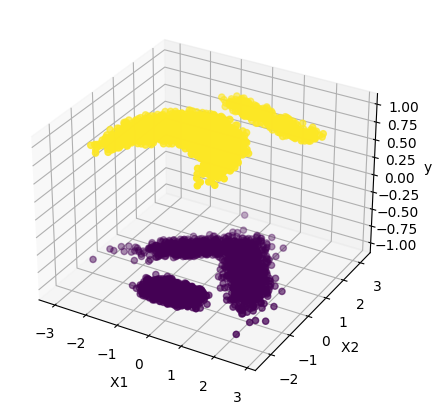

In [4]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(5,5))
ax1 = fig.add_subplot(111,projection='3d')
ax1.scatter(a,b,y,c=y,marker='o')

ax1.set_xlabel('X1 ')
ax1.set_ylabel('X2 ')
ax1.set_zlabel('y ')
plt.show()





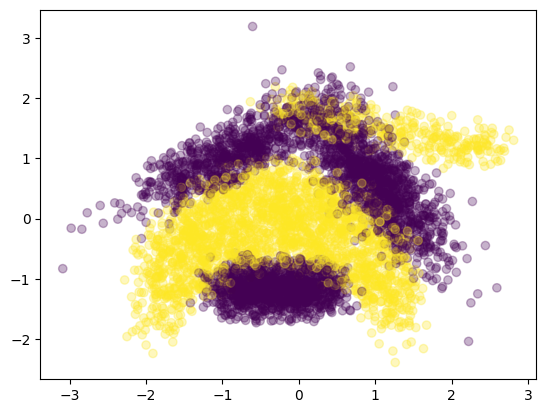

In [5]:

plt.scatter(df.x1, df.x2, c =df.y ,alpha =0.3)
plt.show()

In [6]:

for i in range(0,3):
    for j in range(0,3):
        s="x1**"+str(i)+"_"+"x2**"+str(j)
        
        df[s]=df["x1"]**i*df["x2"]**j
df.head()

,x1,x2,y,x1**0_x2**0,x1**0_x2**1,x1**0_x2**2,x1**1_x2**0,x1**1_x2**1,x1**1_x2**2,x1**2_x2**0,x1**2_x2**1,x1**2_x2**2
0,1.140,-0.114,-1,1.0,-0.114,0.012996,1.140,-0.129960,0.014815,1.299600,-0.148154,0.016890
1,-1.520,-1.150,1,1.0,-1.150,1.322500,-1.520,1.748000,-2.010200,2.310400,-2.656960,3.055504
2,-1.050,0.720,-1,1.0,0.720,0.518400,-1.050,-0.756000,-0.544320,1.102500,0.793800,0.571536
3,-0.916,0.397,1,1.0,0.397,0.157609,-0.916,-0.363652,-0.144370,0.839056,0.333105,0.132243
4,-1.090,0.437,1,1.0,0.437,0.190969,-1.090,-0.476330,-0.208156,1.188100,0.519200,0.226890


In [7]:
df.shape

(5300, 12)

In [8]:
df.drop(df.columns[[3, 4, 6]], axis=1, inplace=True)
df.shape

(5300, 9)

In [9]:
df.head()

,x1,x2,y,x1**0_x2**2,x1**1_x2**1,x1**1_x2**2,x1**2_x2**0,x1**2_x2**1,x1**2_x2**2
0,1.140,-0.114,-1,0.012996,-0.129960,0.014815,1.299600,-0.148154,0.016890
1,-1.520,-1.150,1,1.322500,1.748000,-2.010200,2.310400,-2.656960,3.055504
2,-1.050,0.720,-1,0.518400,-0.756000,-0.544320,1.102500,0.793800,0.571536
3,-0.916,0.397,1,0.157609,-0.363652,-0.144370,0.839056,0.333105,0.132243
4,-1.090,0.437,1,0.190969,-0.476330,-0.208156,1.188100,0.519200,0.226890


In [10]:

train=df.iloc[:400]
print(train.shape)
X_train=train[["x1","x2","x1**0_x2**2","x1**1_x2**1","x1**1_x2**2","x1**2_x2**0","x1**2_x2**1","x1**2_x2**2"]]
Y_train=train["y"]
print(X_train.shape,Y_train.shape)

test=df.iloc[400:]
print(test.shape)
X_test=test[["x1","x2","x1**0_x2**2","x1**1_x2**1","x1**1_x2**2","x1**2_x2**0","x1**2_x2**1","x1**2_x2**2"]]
Y_test=test["y"]
print(X_test.shape,Y_test.shape)

(400, 9)
(400, 8) (400,)
(4900, 9)
(4900, 8) (4900,)


In [11]:

def loss_func_gradient_descend(lm,w,kappa):
    n=len(X_train)
    #minibatch = X_train.sample(n=30,replace=False)
    #print(minibatch.shape)
    error=0
    grad=0
    h=np.array(X_train.values)
    ar = np.random.choice(range(n), kappa, replace=False)
    n=len(ar)
    for i in ar:
        
        yp=np.sign(np.dot(w,h[i]))
        error+=((Y_train[i]-yp)**2)/(2*n)
        grad+=(-1*(Y_train[i]-yp)/n)*h[i]


    
    error+=lm*np.dot(w,w)/2
    grad+=lm*w
    
    return error,grad
    


In [12]:
import math
def grddes(alpha,lm,kappa):
    w=np.ones(len(X_train.values[0]))
    errorarr=[]
    gradarr=[]
    wkfinal=0
    gf=0
    
   
    ef=math.inf
    for i in range(5000):
        e,g=loss_func_gradient_descend(lm,w,kappa)
        if i>1000:
            w=w-g*(alpha/(i+1))
        
        else:
            w=w-g*(0.01)
        errorarr.append(e)
        gradarr.append(LA.norm(g))
        if e<ef:
            wkfinal=w
            gf=g
            ef=e
            #print(i,e)
            
    return ef,wkfinal,gf,gradarr,errorarr
        
result=[]
result.append(grddes(1,1,len(X_train)))
result.append(grddes(1,1,30))
result.append(grddes(1,1,1))



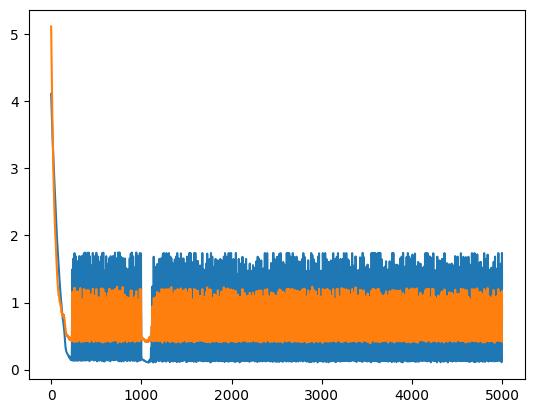

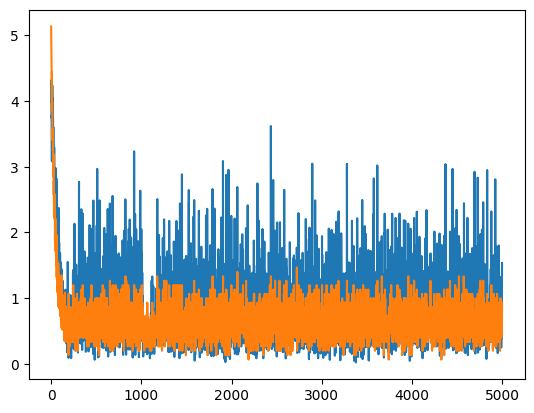

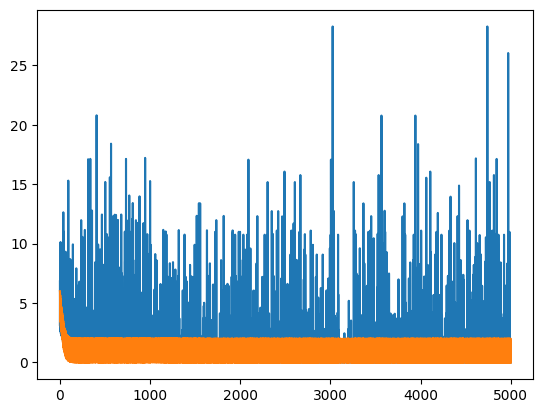

In [13]:
for i in range(3):
    plt.plot(result[i][3])
    plt.plot(result[i][4])
    plt.show()

In [14]:
for i in range(3):
    print(result[i][0])
print("*******************")
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
def evaluate(wkfinal):
    def fit_testdata():
        ypred=np.zeros(len(X_test))

        for i in range(len(X_test)):
            ypred[i]=np.sign(np.dot(wkfinal,X_test.values[i]))
        return ypred

    ypred=fit_testdata()


    print(accuracy_score(Y_test,ypred))
    print(confusion_matrix(Y_test, ypred))


    #print(wkfinal)
    def fit_traindata():
        ypred=np.zeros(len(X_train))
        for i in range(len(X_train)):
            ypred[i]=np.sign(np.dot(wkfinal,X_train.values[i]))
        return ypred

    ypred=fit_traindata()
    print(accuracy_score(Y_train,ypred))
    print(confusion_matrix(Y_train, ypred))
    
    print("________________________________________________________________________________________________")
evaluate(result[0][1])
evaluate(result[1][1])
evaluate(result[2][1])


0.3950000447985545
0.06666671521569824
7.052834430449812e-06
*******************
0.7761224489795918
[[2438  261]
 [ 836 1365]]
0.7725
[[206  19]
 [ 72 103]]
________________________________________________________________________________________________
0.7526530612244898
[[2562  137]
 [1075 1126]]
0.7475
[[214  11]
 [ 90  85]]
________________________________________________________________________________________________
0.6328571428571429
[[1272 1427]
 [ 372 1829]]
0.635
[[109 116]
 [ 30 145]]
________________________________________________________________________________________________


In [15]:

minibatch = X_train.sample(n=333,replace=False)
minibatch.shape

(333, 8)

# This is a polynomial of order 5.


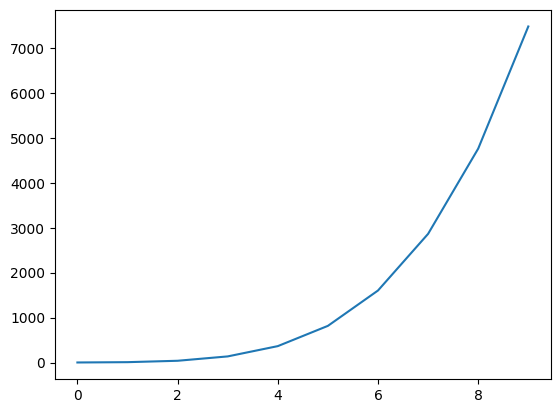

In [16]:
def PolyCoefficients(x, coeffs):
    """ Returns a polynomial for ``x`` values for the ``coeffs`` provided.

    The coefficients must be in ascending order (``x**0`` to ``x**o``).
    """
    o = len(coeffs)
    print(f'# This is a polynomial of order {o}.')
    y = 0
    for i in range(o):
        y += coeffs[i]*x**i
    return y

x = np.linspace(0, 9, 10)
coeffs = [1, 3,2,1,1]
plt.plot(x, PolyCoefficients(x, coeffs))
plt.show()


10000 10000 10000


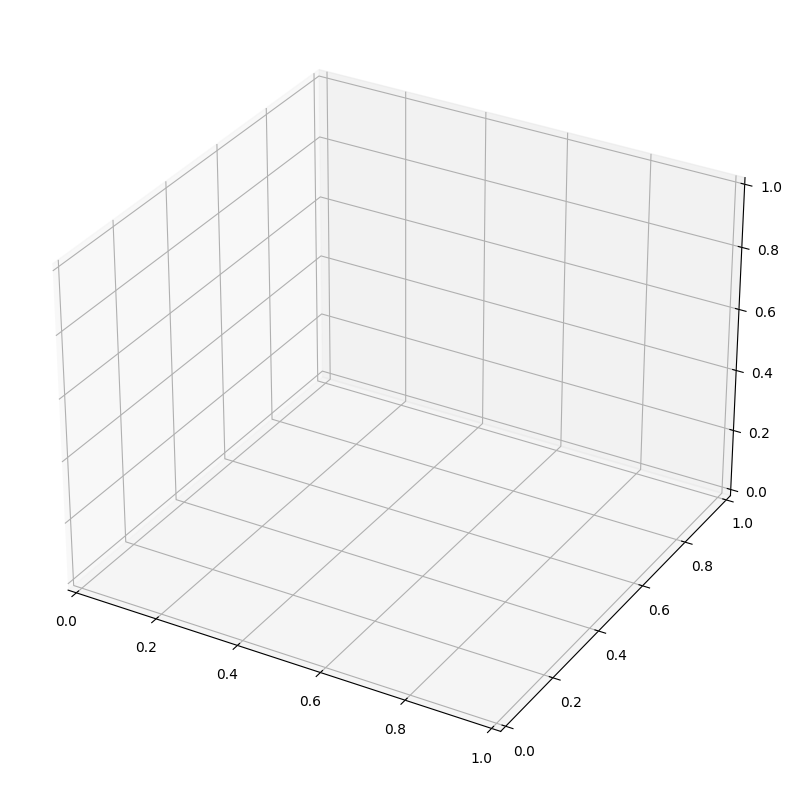

In [17]:
A=df["x1"][:100]
B=df["x2"][:100]
w=result[0][1]
z = []
x=[]
y=[]
for a in (A):
    for b in (B):
        #print(len(x),len(y),len(z))
        x.append(a)
        y.append(b)
        z.append(w[0]*a+w[1]*b+w[2]*b**2+w[3]*a*b+w[4]*a*b**2+w[5]*a**2+w[6]*a**2*b+w[7]*a**2*b**2)


print(len(z),len(x),len(y))

fig = plt.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection='3d')

ax1.scatter([0,0,0],[1,1.1,1.2],[2,1,3],marker='o')

plt.show()

In [18]:
df.shape

(5300, 9)

In [19]:
A.shape

(100,)